In [ ]:
### This code provides a detailed instructions to calculate PhyloFunc distance using PhyloFunc pacakge
# based on human gut microbiome

In [2]:
import pandas as pd
from collections import Counter
import os
import math
import numpy as np
os.chdir("C:/Users/wangl/Desktop/UHGG_yutong")

In [3]:
# Step1: Please prepare the Genome-COG table in CSV format, including information on the genome, function, and protein intensity. 
##The first column should be the MGYG Genome, labeled "Genome," and the second column should be the COG accession, labeled "COG Accession." 
##Additional columns should contain intensity information of metaproteomic data. 
##Rows with the same genome and COG accession should be grouped, and their intensity values should be summed up.

#read Genome-COG table
Genome_COG = pd.read_csv("Genome-COG.csv", sep = ',')

In [4]:
#Step2.1: import PhyloFunc package and calculate the PhyloFunc distance or PhyloFunc distance matrix
#default phylogenetic tree based on the UHGG database and functional information by annotating metaproteomics data by MetalabMAG 1.0.7
from PhyloFunc.PhyloFunc import PhyloFunc_Distance
sample_pair=Genome_COG.iloc[:, :4]
sample_pair.to_csv("sample_pair.csv",index=False)
PhyloFunc_Distance(sample_file="sample_pair.csv")

The PhyloFunc distance of "DC.M.48.1" and "DC.H.48.1" is 0.8489348294500464.
Finish, time 66.63 seconds


In [ ]:
#Step2.2:calculate PhyloFunc distance matrix for all of samples
#it will takes almost 6 hours.
from PhyloFunc.PhyloFunc import PhyloFunc_matirx
data_PhyloFunc_all=PhyloFunc_matirx(sample_file="Genome-COG.csv")

Intermediate result 0.8489348294500464


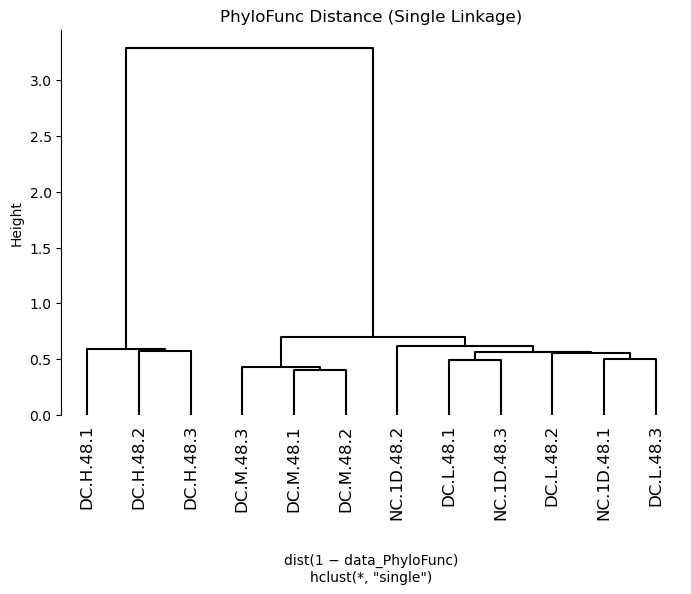

In [25]:
# Step3: plot a hierarchical clustering figure based on PhyloFunc matrix
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import pandas as pd

# selelct the drug DC
data_PhyloFunc = data_PhyloFunc_all.filter(regex="DC|NC").T
dist_PhyloFunc = pdist(1 - data_PhyloFunc, metric='euclidean')
linkage_PhyloFunc_single = linkage(dist_PhyloFunc, method='single')

# create a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

dendrogram_kwargs = dict(leaf_rotation=90, color_threshold=0, above_threshold_color='black')

# plot bierarchical clustering
dendrogram(linkage_PhyloFunc_single, ax=ax, labels=data_PhyloFunc.index, **dendrogram_kwargs)
ax.set_title('PhyloFunc Distance (Single Linkage)')
ax.set_ylabel('Height')

# Add annotation text
ax.text(0.5, -0.4, "dist(1 − data_PhyloFunc)\nhclust(*, \"single\")",
        ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust axis style
def style_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
style_axes(ax)
plt.show()